# Time series

    datetime, Timestamp, timedelta

    rolling, resample, corr, autocorr

    optionally statsmodels

https://onemocneni-aktualne.mzcr.cz/covid-19

In [1]:
import datetime

## to plot date on the  x -axis two imports and the register_
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters, deregister_matplotlib_converters
register_matplotlib_converters()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
cm = 1/2.54  # centimeters in inches

### Today

In [2]:
today=datetime.datetime.today()
print("This notebook was evaluated at {}.".format(today.date()))

This notebook was evaluated at 2023-02-27.


## pd.Timestamp

https://docs.python.org/3/library/datetime.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

### Timestamp constructors and methods

Timestamp from text

In [3]:
from_idx=pd.to_datetime('1.10.2020',format= '%d.%m.%Y')
to_idx=pd.to_datetime('30.3.2021',format= '%d.%m.%Y')
from_idx

Timestamp('2020-10-01 00:00:00')

from numbers

In [4]:
ts=pd.Timestamp(year=2022, month=3, day=10, hour=12, minute=20)
print(ts)

2022-03-10 12:20:00


attributes and methods

In [5]:
print('Week {}\nWeekday {}\nMonth {}'.format(ts.week,ts.weekday(),ts.month))

Week 10
Weekday 3
Month 3


### timedelta

its constructor and ussage

In [6]:
print('Next meetings:')
lecture=pd.Timestamp(year=2023, month=3, day=2)
for i in range(1,6):
    dt=(lecture+i*pd.to_timedelta('2W')).date()
    print('{}.{}.'.format(dt.day,dt.month), end=',')

Next meetings:
16.3.,30.3.,13.4.,27.4.,11.5.,

## Demo datasets MZCR

you should find data from your country or download actual data from https://onemocneni-aktualne.mzcr.cz/covid-19

In [7]:
covid=pd.read_csv('data/covid.csv')
hospit=pd.read_csv('data/hospitalizace.csv')

In [8]:
covid.columns

Index(['datum', 'kumulativni_pocet_nakazenych', 'kumulativni_pocet_vylecenych',
       'kumulativni_pocet_umrti', 'kumulativni_pocet_testu',
       'kumulativni_pocet_ag_testu'],
      dtype='object')

### Translation:
date, cummulative_number_of_infected, cummulative_number_of_healed, cummulative_number_of_dead, cummulative_number_of_tests, cummulative_number_of_ag_tests

In [9]:
namesE=['date', 'cummulative_number_of_infected', 'cummulative_number_of_healed', 
        'cummulative_number_of_dead', 'cummulative_number_of_tests', 
        'cummulative_number_of_ag_tests']
#covid.columns=namesE
#covid.columns

## Hospitalizations data

In [10]:
hospit.columns

Index(['datum', 'pacient_prvni_zaznam', 'kum_pacient_prvni_zaznam',
       'pocet_hosp', 'stav_bez_priznaku', 'stav_lehky', 'stav_stredni',
       'stav_tezky', 'jip', 'kyslik', 'hfno', 'upv', 'ecmo', 'tezky_upv_ecmo',
       'umrti', 'kum_umrti'],
      dtype='object')

### Translation:
date, first_record, cummulative_first_record, hospitalized, number_without_symptoms, mild_state, middle_state, serious_state, jip_intensive_care_unit, oxigen, hfno, upv, emco, serious_upv_emco, deads, cummulative_deads

In [11]:
covid.datum.head()

0    2020-01-27
1    2020-01-28
2    2020-01-29
3    2020-01-30
4    2020-01-31
Name: datum, dtype: object

## Conversion Object to datetime

In the previous, $datum$ is an $object$.


pd.to_datetime

In [12]:
for df in [covid,hospit]:
    df['den']=pd.to_datetime(df['datum'],format= '%Y-%m-%d')
    df.set_index('den', inplace=True)
    df.drop(columns=['datum'],inplace=True)

## Datum is a datatime64

In [13]:
covid.index

DatetimeIndex(['2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05',
               ...
               '2021-03-20', '2021-03-21', '2021-03-22', '2021-03-23',
               '2021-03-24', '2021-03-25', '2021-03-26', '2021-03-27',
               '2021-03-28', '2021-03-29'],
              dtype='datetime64[ns]', name='den', length=428, freq=None)

In [14]:
hospit.tail()

,pacient_prvni_zaznam,kum_pacient_prvni_zaznam,pocet_hosp,stav_bez_priznaku,stav_lehky,stav_stredni,stav_tezky,jip,kyslik,hfno,upv,ecmo,tezky_upv_ecmo,umrti,kum_umrti
den,,,,,,,,,,,,,,,
2021-03-26,703,117348,8029,431,1928,3828,1842,1681,3334,887,903,29,1843,134,23072
2021-03-27,550,117898,7471,319,1556,3789,1807,1643,3336,894,867,29,1807,160,23232
2021-03-28,487,118385,7524,297,1632,3827,1768,1659,3370,892,854,27,1769,99,23331
2021-03-29,766,119151,8067,454,1987,3842,1784,1666,3339,890,858,29,1785,158,23489
2021-03-30,434,119585,7580,386,1795,3681,1717,1600,3201,863,824,29,1717,85,23574


## Number of sick (='nemocnych')

we set the start index: from_idx

In [15]:
covid['nemocnych']=covid.kumulativni_pocet_nakazenych-covid.kumulativni_pocet_vylecenych-covid.kumulativni_pocet_umrti

data=covid[from_idx:].nemocnych

## Data, rolling average, diff (diference)

data.rolling(7,center=True,closed='both').mean()

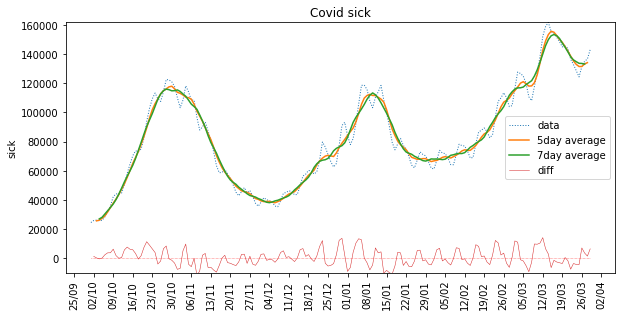

In [16]:
plt.subplots(figsize=(25*cm, 13*cm))


plt.plot(data,label='data',linewidth=1,linestyle=':')
plt.plot(data.rolling(5,center=True,closed='both').mean(),label='5day average')
plt.plot(data.rolling(7,center=True,closed='both').mean(),label='7day average')
#plt.title('Rolling average')
plt.ylabel('sick')
plt.title('Covid sick')

### x labels per week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.gcf().autofmt_xdate(rotation=90,which='both',ha='center')

### I just played downside: the diference diff
plt.plot(data.diff(),label='diff',linewidth=0.5)
plt.hlines(0,min(data.index),max(data.index),color='red',linestyle=':',linewidth=0.5)
plt.ylim(-10000,max(covid[from_idx:].nemocnych))

plt.legend()
plt.show()

## Resample

https://numpy.org/doc/stable/reference/arrays.datetime.html

We resample the data and plot the week averages. That means just 1/7 values at x axis.

[]

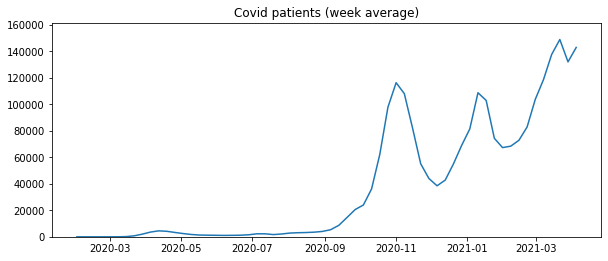

In [17]:
plt.subplots(figsize=(25*cm, 10*cm))
plt.plot(covid[:].nemocnych.resample('1W').mean())
plt.tick_params(axis="x")
plt.ylim(0,max(covid[:].nemocnych))
plt.title('Covid patients (week average)')
plt.plot()

## Differences

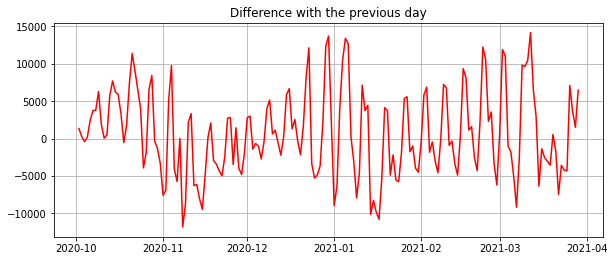

In [18]:
plt.subplots(figsize=(25*cm, 10*cm))
plt.plot(data.diff(),label='diff',color='red')
plt.tick_params(axis="x")#, rotation=90)
plt.title('Difference with the previous day')
plt.grid()
plt.show()

## Autocorrelation

lag:0 Autocorr:0.9999999999999999  
lag:1 Autocorr:0.5586860810814752  
lag:2 Autocorr:0.026136317151571213  
lag:3 Autocorr:-0.20914480367346358  
lag:4 Autocorr:-0.2657213174274982  
lag:5 Autocorr:-0.10115712095755158  
lag:6 Autocorr:0.34556078271127305  
lag:7 Autocorr:0.6677357960272479  


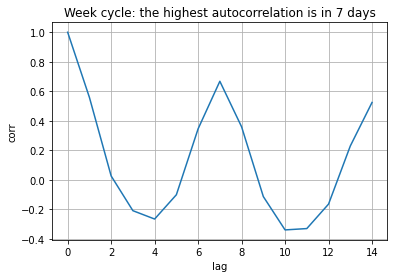

In [19]:
for i in range(8):
    print('lag:{} Autocorr:{}  '.format(i,data.diff().autocorr(lag=i)))
plt.plot([data.diff().autocorr(lag=i) for i in range(15)])
plt.title('Week cycle: the highest autocorrelation is in 7 days')
plt.xlabel('lag')
plt.ylabel('corr')
plt.grid()

## lag_plot displays autocorrelation

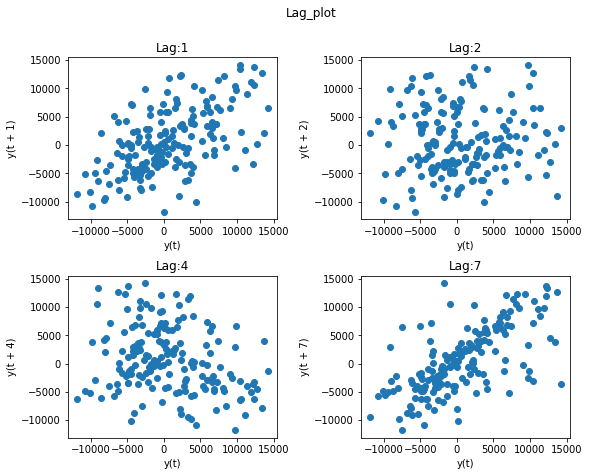

In [20]:
fig, ax_lst = plt.subplots(2, 2, figsize=(9, 7))  
fig.subplots_adjust(hspace=0.35, wspace=0.4)
fig.suptitle('Lag_plot')  
lags=[1,2,4,7]
for idx in range(4):
    plt.subplot(2,2,idx+1)
    pd.plotting.lag_plot(data.diff(), lag=lags[idx])
    plt.title('Lag:{}'.format(lags[idx]))
plt.show()

## Each week in one line,  .diff plot

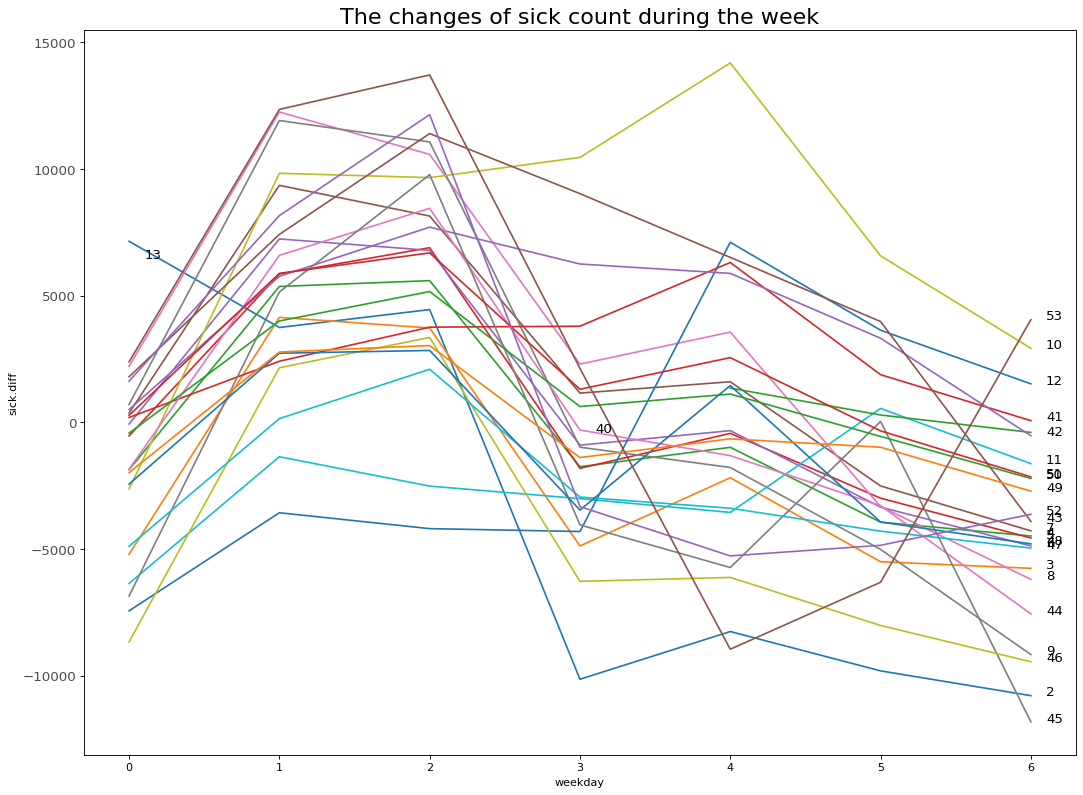

In [21]:
import warnings
warnings.filterwarnings("ignore")

df=pd.DataFrame(covid[from_idx:].nemocnych.diff())
index=df.index
df['week'] = [d.week for d in index]
df['day'] = [d.weekday() for d in index]
weeks = set(df['week'])

plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(weeks):
    if i > 0:        
        plt.plot('day', 'nemocnych', data=df.loc[df.week==y, :], label=y)
        plt.text(df.loc[df.week==y, :].shape[0]-.9, df.loc[df.week==y, 'nemocnych'][-1:].values[0], y, fontsize=12)

plt.gca().set(ylabel='sick.diff', xlabel='weekday') #axis
plt.yticks(fontsize=12, alpha=.7)
plt.title("The changes of sick count during the week", fontsize=20)
plt.show()

## Column correlation in the DataFrame

a test, whether are two columns 'simmilar' = correlated

In [22]:
covid[['kumulativni_pocet_nakazenych', 'kumulativni_pocet_testu']].corr()

,kumulativni_pocet_nakazenych,kumulativni_pocet_testu
kumulativni_pocet_nakazenych,1.000000,0.981182
kumulativni_pocet_testu,0.981182,1.000000


## General Series Correlation

covid.nemocnych

hospit.jip

by different time_delta shift

In [23]:
for lag in range(0,60,10):
    delta=pd.to_timedelta(lag,'D')
    print('Lag:{} corr:{}'.format(lag,
        covid.nemocnych[from_idx:to_idx].corr(hospit.jip[(from_idx+delta):(to_idx+delta)])
                                  ))

Lag:0 corr:0.8379968603969892
Lag:10 corr:0.8073548076729067
Lag:20 corr:0.8151948744927536
Lag:30 corr:0.8973332063207873
Lag:40 corr:0.9156684206953594
Lag:50 corr:0.9173342640458012


[]

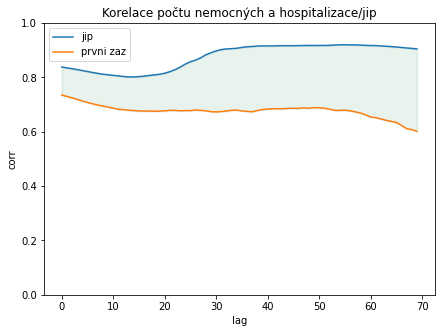

In [24]:
fig, ax_lst = plt.subplots(figsize=(7, 5))  
jip_plot=[covid.nemocnych[from_idx:to_idx].corr(hospit.jip[(from_idx+pd.to_timedelta(lag,'D')):(to_idx+pd.to_timedelta(lag,'D'))]) for lag in range(70)]
prv_plot=[covid.nemocnych[from_idx:to_idx].corr(hospit.pacient_prvni_zaznam[(from_idx+pd.to_timedelta(lag,'D')):(to_idx+pd.to_timedelta(lag,'D'))]) for lag in range(70)]
plt.plot(jip_plot,label='jip')
plt.plot(prv_plot,label='prvni zaz')
plt.fill_between(x=range(len(jip_plot)),y1=jip_plot, y2=prv_plot, alpha=0.1, linewidth=2, color='seagreen')
plt.ylim(0,1)
plt.legend()
plt.title('Korelace počtu nemocných a hospitalizace/jip')
plt.xlabel('lag')
plt.ylabel('corr')
plt.plot()

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

## Statsmodels seasonal_decompose

Exercise: do this without statmodels library

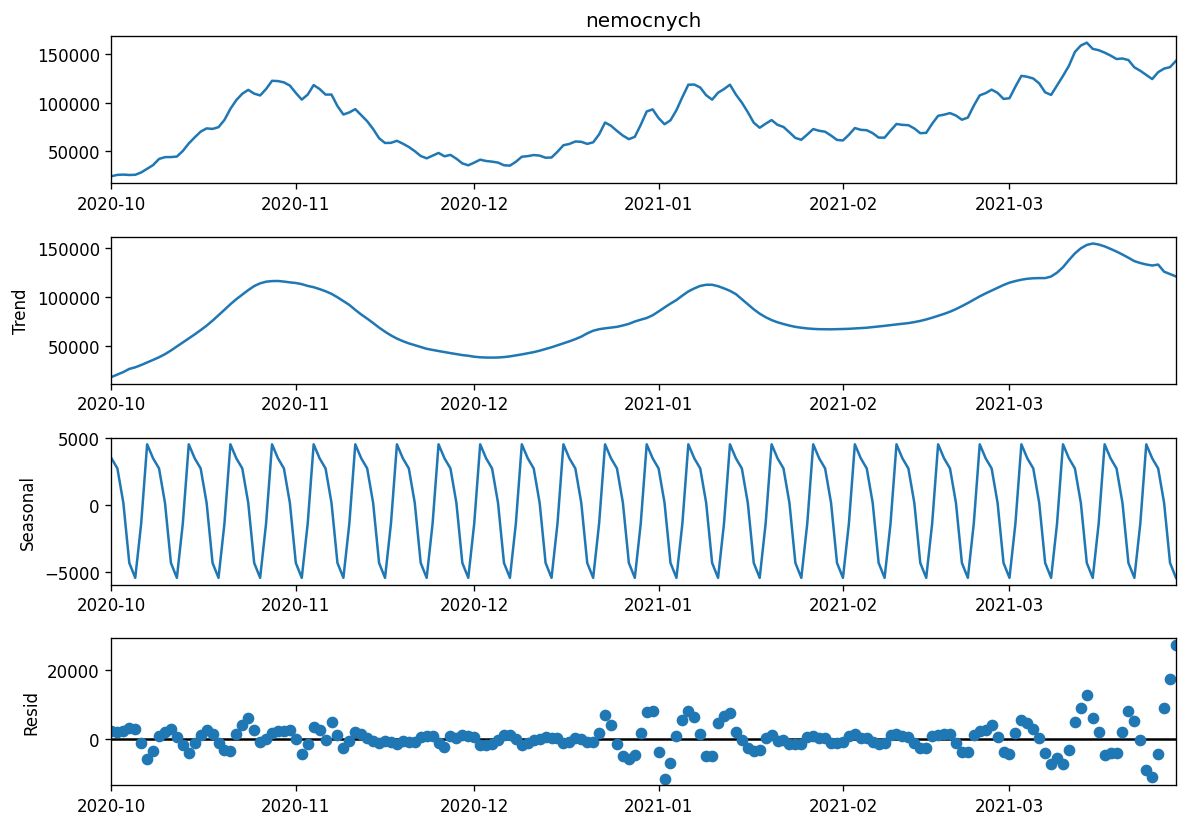

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

old_pars=(plt.rcParams['figure.figsize'],plt.rcParams['figure.dpi'] )
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

result_add = seasonal_decompose(data, model='additive', extrapolate_trend='freq')
result_add.plot()
plt.show()
plt.rcParams.update({'figure.figsize':old_pars[0], 'figure.dpi': old_pars[1]})


## Python __dict__

\_\_dict\_\_

In [26]:
result_add.__dict__.keys()

dict_keys(['_seasonal', '_trend', '_weights', '_resid', '_observed'])

## Statsmodels

an exaple of another way of smoothing - locally linear regression, lowess

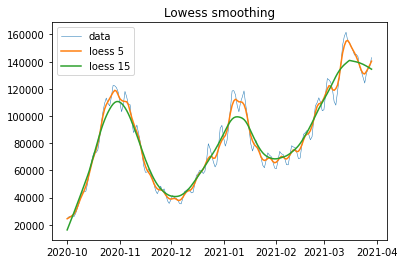

In [27]:
from statsmodels.nonparametric.smoothers_lowess import lowess
df_lowess_5 = pd.DataFrame(lowess(data, np.arange(len(data)), frac=0.05)[:, 1], index=data.index)
df_lowess_15 = pd.DataFrame(lowess(data, np.arange(len(data)), frac=0.15)[:, 1], index=data.index)
plt.plot(data,label='data',linewidth=0.5)
plt.plot(df_lowess_5,label='loess 5')
plt.plot(df_lowess_15,label='loess 15')
plt.legend()
plt.title('Lowess smoothing')
plt.show()

# Task

Try to find COVID data from your country. If not successfull, use another time sequence.

Czech students: download current dataset https://onemocneni-aktualne.mzcr.cz/covid-19  COVID-19: Základní přehled

1. Calculate 1M sum graph.
1. Select last few months and calculate the 1W rolling average.
3. Select some period and try the seasonal decomposition by statmodels.


# Find your dataset

If no idea, look at kaggle
https://www.kaggle.com/datasets


Analyze the data on your own; it is usually dificult beat the submited solutions.